In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [50]:
df = pd.read_csv('./train.csv', index_col="Id")
df.head(1)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [51]:
X = df
y = df['SalePrice']

In [52]:
X = df.drop(['Alley', 'PID', 'Utilities','Exterior 2nd', 
         'Bsmt Exposure','BsmtFin Type 2','BsmtFin SF 2','Bsmt Unf SF',
         'Heating','Electrical','Low Qual Fin SF','Bsmt Half Bath',
         'Functional','Fireplace Qu','Garage Yr Blt','Garage Finish',
         'Garage Area','Garage Qual','Garage Cond','3Ssn Porch','Screen Porch',
         'Pool Area','Pool QC','Misc Feature', 'Mo Sold','Yr Sold','Sale Type'], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 53 columns):
MS SubClass       2051 non-null int64
MS Zoning         2051 non-null object
Lot Frontage      1721 non-null float64
Lot Area          2051 non-null int64
Street            2051 non-null object
Lot Shape         2051 non-null object
Land Contour      2051 non-null object
Lot Config        2051 non-null object
Land Slope        2051 non-null object
Neighborhood      2051 non-null object
Condition 1       2051 non-null object
Condition 2       2051 non-null object
Bldg Type         2051 non-null object
House Style       2051 non-null object
Overall Qual      2051 non-null int64
Overall Cond      2051 non-null int64
Year Built        2051 non-null int64
Year Remod/Add    2051 non-null int64
Roof Style        2051 non-null object
Roof Matl         2051 non-null object
Exterior 1st      2051 non-null object
Mas Vnr Type      2029 non-null object
Mas Vnr Area      2029 non-null float64


In [53]:
X.isnull().sum() # null values by series

MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           55
Bsmt Cond           55
BsmtFin Type 1      55
BsmtFin SF 1         1
Total Bsmt SF        1
Heating QC           0
Central Air          0
1st Flr SF           0
2nd Flr SF           0
Gr Liv Area          0
Bsmt Full Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Fireplaces 

In [54]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MS SubClass,2051.0,57.008776,42.824223,20.0,20.0,50.0,70.00,190.0
Lot Frontage,1721.0,69.055200,23.260653,21.0,58.0,68.0,80.00,313.0
Lot Area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.50,159000.0
Overall Qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.00,10.0
Overall Cond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.00,9.0
Year Built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0,2001.00,2010.0
Year Remod/Add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0,2004.00,2010.0
Mas Vnr Area,2029.0,99.695909,174.963129,0.0,0.0,0.0,161.00,1600.0
BsmtFin SF 1,2050.0,442.300488,461.204124,0.0,0.0,368.0,733.75,5644.0
Total Bsmt SF,2050.0,1057.987805,449.410704,0.0,793.0,994.5,1318.75,6110.0


In [55]:
X['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [56]:
X['Lot Frontage'].fillna(0, inplace=True)# Convert null values to zeros
X['Full Bath'].fillna(0, inplace=True)
X['BsmtFin SF 1'].fillna(0, inplace=True)
X['BsmtFin Type 1'].fillna('None', inplace=True)
X.drop('Fence', axis=1, inplace=True)
X['Mas Vnr Area'].fillna(0, inplace=True)
X['Garage Type'].fillna('None', inplace=True)
X['Mas Vnr Type'].fillna('None', inplace=True)
X['Total Bsmt SF'].fillna(0, inplace=True)
X['Bsmt Full Bath'].fillna(0, inplace=True)
X['Garage Cars'].fillna(0, inplace=True)
X['Bsmt Qual'].fillna(0, inplace=True)
X['Bsmt Cond'].fillna(0, inplace=True)

In [57]:
X.isnull().sum().sum()

0

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 52 columns):
MS SubClass       2051 non-null int64
MS Zoning         2051 non-null object
Lot Frontage      2051 non-null float64
Lot Area          2051 non-null int64
Street            2051 non-null object
Lot Shape         2051 non-null object
Land Contour      2051 non-null object
Lot Config        2051 non-null object
Land Slope        2051 non-null object
Neighborhood      2051 non-null object
Condition 1       2051 non-null object
Condition 2       2051 non-null object
Bldg Type         2051 non-null object
House Style       2051 non-null object
Overall Qual      2051 non-null int64
Overall Cond      2051 non-null int64
Year Built        2051 non-null int64
Year Remod/Add    2051 non-null int64
Roof Style        2051 non-null object
Roof Matl         2051 non-null object
Exterior 1st      2051 non-null object
Mas Vnr Type      2051 non-null object
Mas Vnr Area      2051 non-null float64


In [59]:
X['MS SubClass'] = X['MS SubClass'].astype(str)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 52 columns):
MS SubClass       2051 non-null object
MS Zoning         2051 non-null object
Lot Frontage      2051 non-null float64
Lot Area          2051 non-null int64
Street            2051 non-null object
Lot Shape         2051 non-null object
Land Contour      2051 non-null object
Lot Config        2051 non-null object
Land Slope        2051 non-null object
Neighborhood      2051 non-null object
Condition 1       2051 non-null object
Condition 2       2051 non-null object
Bldg Type         2051 non-null object
House Style       2051 non-null object
Overall Qual      2051 non-null int64
Overall Cond      2051 non-null int64
Year Built        2051 non-null int64
Year Remod/Add    2051 non-null int64
Roof Style        2051 non-null object
Roof Matl         2051 non-null object
Exterior 1st      2051 non-null object
Mas Vnr Type      2051 non-null object
Mas Vnr Area      2051 non-null float64

In [60]:
X['Year Built'] = X['Year Built'].apply(lambda x: 2018 - x)

In [61]:
X['Year Remod/Add'] = X['Year Remod/Add'].apply(lambda x: 2018 - x)

In [62]:
X['Year Remod/Add'].head(1)

Id
109    13
Name: Year Remod/Add, dtype: int64

In [63]:
X = X[['Lot Area', 'Overall Qual', 
       'Overall Cond', 'Year Built', 
       'Bsmt Qual', 'Total Bsmt SF', 
       '1st Flr SF', '2nd Flr SF', 
       'Gr Liv Area', 'Bsmt Full Bath', 
       'Full Bath', 'Half Bath','Kitchen Qual',]]

In [64]:
def corr_map(df, figsize=(20,10), mask_val = None):
    # Make correlation heat map from pandas dataframe
    # pass a value to mask_val to only see correlations
    # above a certain value (the absolute value of the correlation)

    # Arguments:
    # df - pandas dataframe to with data for heatmap
    # figsize - size of resulting figure (width, height), default: (15, 10) (inches?)
    # mask_val - threshold for displaying correlations, default: None

    corr = X.corr()    
    
    # Make mask to only show bottom triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(corr)] = True
    
    # Add to the mask (if mask_val passed)
    if (mask_val != None):
        mask[abs(corr) < mask_val] = True
    
    # Make heatmap
    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr,vmin=0.4,vmax=1, mask=mask, annot=True, fmt='.2g')
    pass

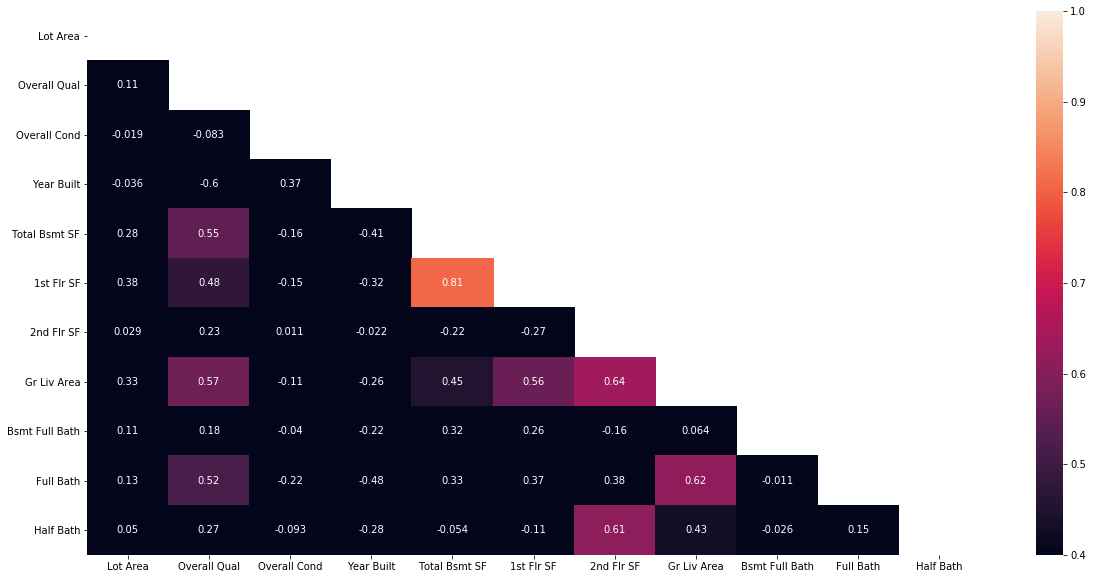

In [65]:
corr_map(X);

In [66]:
X['1stfl+Totbsmt'] = X['1st Flr SF'] * X['Total Bsmt SF']
X['Grliv+2ndfl'] = X['Gr Liv Area'] * X['2nd Flr SF']
X['Halfbath+2ndfl'] = X['Half Bath'] * X['2nd Flr SF']
X['Fullbath+Grliv'] = X['Full Bath'] * X['Gr Liv Area']

In [67]:
X.head(1).T

Id,109
Lot Area,13517
Overall Qual,6
Overall Cond,8
Year Built,42
Bsmt Qual,TA
Total Bsmt SF,725
1st Flr SF,725
2nd Flr SF,754
Gr Liv Area,1479
Bsmt Full Bath,0


In [68]:
X = pd.get_dummies(X, columns=['Bsmt Qual',
                               'Kitchen Qual'],
                                drop_first=True)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [70]:
X_train.shape, y_train.shape

((1538, 23), (1538,))

In [71]:
r_alphas = np.logspace(0, 5, 200) # generates 200 points between 10^0, 10^5
ridge_model = RidgeCV(alphas=r_alphas, store_cv_values=True)
ridge_model = ridge_model.fit(X_train, y_train)

In [72]:
ridge_optimal_alpha = ridge_model.alpha_

In [73]:
alpha = ridge_optimal_alpha
ridge_model = Ridge(alpha=alpha)  # This replaces LinearRegression
ridge_cv_mean_mse = -cross_val_score(ridge_model,
                                  X_train,
                                  y_train,
                                  cv=5,
                                  scoring='neg_mean_squared_error').mean()
ridge_cv_mean_r2 = cross_val_score(ridge_model,
                                  X_train,
                                  y_train,
                                  cv=5,
                                  scoring='r2').mean()
ridge_cv_mean_mse, ridge_cv_mean_r2, ridge_cv_mean_mse**(1/2)

(922687100.2681602, 0.8468271019622498, 30375.76501535657)

In [74]:
ridge_cv_mean_mse = -cross_val_score(ridge_model,
                                  X_test,
                                  y_test,
                                  cv=5,
                                  scoring='neg_mean_squared_error').mean()
ridge_cv_mean_mse, ridge_cv_mean_mse**(1/2)

(873107033.9806818, 29548.38462557102)

In [75]:
df_test = pd.read_csv('test.csv')

df_test.shape

(879, 80)

In [76]:
X1 = df_test

In [77]:
X1 = X1.drop(['Alley', 'PID', 'Utilities','Exterior 2nd', 
         'Bsmt Exposure','BsmtFin Type 2','BsmtFin SF 2','Bsmt Unf SF',
         'Heating','Electrical','Low Qual Fin SF','Bsmt Half Bath',
         'Functional','Fireplace Qu','Garage Yr Blt','Garage Finish',
         'Garage Area','Garage Qual','Garage Cond','3Ssn Porch','Screen Porch',
         'Pool Area','Pool QC','Misc Feature', 'Mo Sold','Yr Sold','Sale Type'], axis=1)
X1.isnull().sum() # null values by series

Id                  0
MS SubClass         0
MS Zoning           0
Lot Frontage      160
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Mas Vnr Type        1
Mas Vnr Area        1
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          25
Bsmt Cond          25
BsmtFin Type 1     25
BsmtFin SF 1        0
Total Bsmt SF       0
Heating QC          0
Central Air         0
1st Flr SF          0
2nd Flr SF          0
Gr Liv Area         0
Bsmt Full Bath      0
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Fireplaces          0
Garage Typ

In [78]:
X1['Lot Frontage'].fillna(0, inplace=True)# Convert null values to zeros
X1['Full Bath'].fillna(0, inplace=True)
X1['BsmtFin SF 1'].fillna(0, inplace=True)
X1['BsmtFin Type 1'].fillna('None', inplace=True)
X1.drop('Fence', axis=1, inplace=True)
X1['Mas Vnr Area'].fillna(0, inplace=True)
X1['Garage Type'].fillna('None', inplace=True)
X1['Mas Vnr Type'].fillna('None', inplace=True)
X1['Total Bsmt SF'].fillna(0, inplace=True)
X1['Bsmt Full Bath'].fillna(0, inplace=True)
X1['Garage Cars'].fillna(0, inplace=True)
X1['Bsmt Qual'].fillna(0, inplace=True)
X1['Bsmt Cond'].fillna(0, inplace=True)

In [79]:
X1.isnull().sum().sum()

0

In [80]:
X1['Year Built'] = X1['Year Built'].apply(lambda x: 2018 - x)
X1['Year Remod/Add'] = X1['Year Remod/Add'].apply(lambda x: 2018 - x)

In [81]:
X1 = X1[['Lot Area', 'Overall Qual', 
       'Overall Cond', 'Year Built', 
       'Bsmt Qual', 'Total Bsmt SF', 
       '1st Flr SF', '2nd Flr SF', 
       'Gr Liv Area', 'Bsmt Full Bath', 
       'Full Bath', 'Half Bath','Kitchen Qual',]]

In [82]:
X1['1stfl+Totbsmt'] = X1['1st Flr SF'] * X1['Total Bsmt SF']
X1['Grliv+2ndfl'] = X1['Gr Liv Area'] * X1['2nd Flr SF']
X1['Halfbath+2ndfl'] = X1['Half Bath'] * X1['2nd Flr SF']
X1['Fullbath+Grliv'] = X1['Full Bath'] * X1['Gr Liv Area']

In [83]:
X1 = pd.get_dummies(X1, columns=['Bsmt Qual', 
                                 'Kitchen Qual'],
                                  drop_first=True)

In [84]:
X1.head(1).T

,0
Lot Area,9142.0
Overall Qual,6.0
Overall Cond,8.0
Year Built,108.0
Total Bsmt SF,1020.0
1st Flr SF,908.0
2nd Flr SF,1020.0
Gr Liv Area,1928.0
Bsmt Full Bath,0.0
Full Bath,2.0


In [92]:
X_train.shape

(1538, 24)

In [93]:
X_train['Kitchen Qual_Po'] = 0

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [94]:
X1.shape

(879, 24)

In [95]:
y_pred_ridge = ridge_model.fit(X_train, y_train).predict(X1)

In [96]:
y_pred_ridge.shape

(879,)

In [97]:
X1['SalePrice'] = y_pred_ridge

In [98]:
X1.head(1)

,Lot Area,Overall Qual,Overall Cond,Year Built,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,...,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,SalePrice
0,9142,6,8,108,1020.0,908,1020,1928,0.0,2,...,0,1,0,0,0,1,0,0,0,188051.432652


In [99]:
X1['Id'] = df_test['Id']

In [100]:
X1.head(1)

,Lot Area,Overall Qual,Overall Cond,Year Built,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,...,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,SalePrice,Id
0,9142,6,8,108,1020.0,908,1020,1928,0.0,2,...,1,0,0,0,1,0,0,0,188051.432652,2658


In [101]:
X1 = X1.set_index('Id')

X1 = X1[['SalePrice']]

In [102]:
X1.head()

,SalePrice
Id,
2658,188051.432652
2718,219235.708182
2414,199407.752383
1989,142426.499587
625,217764.424680


In [103]:
X1.to_csv('submission7_reg_brian_collins.csv')